# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [2]:
# import libraries
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

In [4]:
# load messages dataset
messages = pd.read_csv('data/messages.csv')
messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [5]:
# get entries
messages.shape

(26248, 4)

In [6]:
# check nulls
messages.isnull().sum()

id              0
message         0
original    16064
genre           0
dtype: int64

In [7]:
# print nulls
messages[messages.original.isna()==True].head()

,id,message,original,genre
7433,8365,NOTES: It mark as not enough information,NaN,direct
9902,11186,My thoughts and prayers go out to all the live...,NaN,social
9903,11188,I m sorry for the poor people in Haiti tonight...,NaN,social
9904,11189,RT selenagomez UNICEF has just announced an em...,NaN,social
9905,11192,lilithia yes 5.2 magnitude earthquake hit mani...,NaN,social


In [8]:
# get number of unique messages
messages.message.nunique()

26177

In [9]:
# get duplicate rows
print(messages[messages.duplicated()].shape)
messages[messages.duplicated()].head()

(68, 4)


,id,message,original,genre
163,202,?? port au prince ?? and food. they need gover...,p bay pap la syen ak manje. Yo bezwen ed gouve...,direct
656,804,elle est vraiment malade et a besoin d'aide. u...,she is really sick she need your help. please ...,direct
710,862,What is the address of the radio station? I as...,Ki adres radyo a? Paske m bezwen al depoze dos...,direct
1408,1652,"please we need water, food and tents, we have ...","p jwen dlo, manje, tant pou nou demi nou gen 1...",direct
2131,2446,How much money did TV Latino American collect ...,Konbyen kob tv latino america ranmase miami,direct


In [10]:
# load categories dataset
categories = pd.read_csv('data/categories.csv')
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


In [11]:
# get number of entries
categories.shape

(26248, 2)

In [12]:
# get unique ids
categories.id.nunique()

26180

In [13]:
# get duplicates
print(categories[categories.duplicated()].shape)
categories[categories.duplicated()].head()

(32, 2)


,id,categories
656,804,related-2;request-0;offer-0;aid_related-0;medi...
2131,2446,related-1;request-0;offer-0;aid_related-0;medi...
2793,3217,related-1;request-1;offer-0;aid_related-1;medi...
3852,4412,related-1;request-1;offer-0;aid_related-1;medi...
4630,5265,related-2;request-0;offer-0;aid_related-0;medi...


### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [14]:
# merge datasets
df = pd.merge(messages, categories, on=['id'])
df.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


In [15]:
df.shape

(26386, 5)

### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [16]:
# create a dataframe of the 36 individual category columns
categories = df.categories.str.split(';', expand=True)
categories.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [17]:
# select the first row of the categories dataframe
row = categories.values[0]

# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
category_colnames = [cat[:-2] for cat in row]
print(category_colnames)

['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report']


In [18]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [19]:
# check category values
categories.apply(pd.Series.value_counts)

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
aid_centers-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26077.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aid_centers-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aid_related-0,NaN,NaN,NaN,15432.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aid_related-1,NaN,NaN,NaN,10954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buildings-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
transport-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
water-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
water-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather_related-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,19043.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [20]:
for column in categories:
    # set each value to be the last character of the string
    categories[column] = categories[column].str[-1]
    
    # convert column from string to numeric
    categories[column] = pd.to_numeric(categories[column])
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [21]:
# concatenate the original dataframe with the new `categories` dataframe
# drop the original categories column from `df`

df = pd.concat([df, categories], axis=1)
df.drop(['categories'], axis=1, inplace=True)
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [22]:
# check number of duplicates
df[df.duplicated()].shape

(170, 40)

In [23]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [24]:
# check number of duplicates
df[df.duplicated()].shape

(0, 40)

In [25]:
# convert values to 0's and 1's
df = df.replace(2, 1)

In [26]:
df[df.related==2]

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report


#### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [27]:
engine = create_engine('sqlite:///DisasterResponse.db')
df.to_sql('DisasterResponseTable', engine, index=False, if_exists='replace')

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.

# EDA

In [40]:
for col in df.columns[4:].tolist():
    try:
        val = df[col].value_counts()[1]
        print(col, val)
    except Exception as e:
        print('-----')
        print(col)
        print('-----')

related 20094
request 4474
offer 118
aid_related 10860
medical_help 2084
medical_products 1313
search_and_rescue 724
security 471
military 860
-----
child_alone
-----
water 1672
food 2923
shelter 2314
clothing 405
money 604
missing_people 298
refugees 875
death 1194
other_aid 3446
infrastructure_related 1705
transport 1201
buildings 1333
electricity 532
tools 159
hospitals 283
shops 120
aid_centers 309
other_infrastructure 1151
weather_related 7297
floods 2155
storm 2443
fire 282
earthquake 2455
cold 530
other_weather 1376
direct_report 5075


In [49]:
df.drop(['child_alone'], axis=1, inplace=True)

In [62]:
# take second element for sort
def takeSecond(elem):
    return elem[1]

vals = sorted([(col,df[col].value_counts()[1]) for col in df.columns[4:].tolist()], reverse=True, key=takeSecond)
print(vals)

[('related', 20094), ('aid_related', 10860), ('weather_related', 7297), ('direct_report', 5075), ('request', 4474), ('other_aid', 3446), ('food', 2923), ('earthquake', 2455), ('storm', 2443), ('shelter', 2314), ('floods', 2155), ('medical_help', 2084), ('infrastructure_related', 1705), ('water', 1672), ('other_weather', 1376), ('buildings', 1333), ('medical_products', 1313), ('transport', 1201), ('death', 1194), ('other_infrastructure', 1151), ('refugees', 875), ('military', 860), ('search_and_rescue', 724), ('money', 604), ('electricity', 532), ('cold', 530), ('security', 471), ('clothing', 405), ('aid_centers', 309), ('missing_people', 298), ('hospitals', 283), ('fire', 282), ('tools', 159), ('shops', 120), ('offer', 118)]


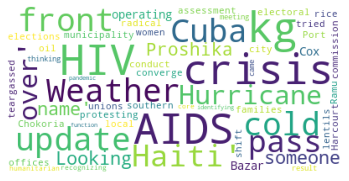

In [69]:
# most common phrases in the messages
# word cloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(background_color='white',
                     stopwords=STOPWORDS,
                     max_words=100,
                     max_font_size=50,
                     random_state=42
                     ).generate(str(df.message.values))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [130]:
!pip install contractions

     |################################| 239 kB 12.1 MB/s eta 0:00:01
     |################################| 312 kB 27.7 MB/s eta 0:00:01
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=101930 sha256=ad30d94c0ff73eba2994c9f0c7cca0caa30ce97e140a033956436be2b12504dd
  Stored in directory: /home/rachneet/.cache/pip/wheels/16/ec/84/27daa7f8d8c0bdad46f462e2834faa13cfda30ea07097e0e3d
Successfully built pyahocorasick
You should consider upgrading via the '/home/rachneet/anaconda3/bin/python -m pip install --upgrade pip' command.


In [131]:
from contractions import contractions_dict

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)
    
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text


def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

In [160]:
import string
import re

# nlp libraries
import nltk
nltk.download(['punkt', 'stopwords', 'wordnet'])

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, WordPunctTokenizer
from nltk.stem import WordNetLemmatizer


def tokenize(text):
    '''
    Args:
        text(string): a string containing the message
    Return:
        tokenized_message(list): a list of words containing the processed message

    '''
    tokenized_message = []
    try:
        
        # for unbalanced parenthesis problem
        text = text.replace(')','')
        text = text.replace('(','')
        
        url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
        
         # get list of all urls using regex
        detected_urls = re.findall(url_regex, text)
        
        # replace each url in text string with placeholder
        for url in detected_urls:
            text = re.sub(url, "urlplaceholder", text)

        # remove whitespaces
        text = re.sub(r" +", " ", text)
        
        # expand contractions
        text = expand_contractions(text, contractions_dict)

        # tokenize text
        tokens = word_tokenize(text)
       
        # initiate lemmatizer
        lemmatizer = WordNetLemmatizer()
        # get stopwords
        stopwords_english = stopwords.words('english')
        stopwords_english += 'u'

        for word in tokens:
            # normalize word
            word = word.lower()
          
            if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
                
                word = lemmatizer.lemmatize(word)  # lemmatizing word
                tokenized_message.append(word)
                
    except Exception as e:
        print(e)
#         print(text)
        
    return tokenized_message

[nltk_data] Downloading package punkt to /home/rachneet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rachneet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/rachneet/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [161]:
text = "Why haven't you done this. Don't do it now u."
tokenize(text)

['done']

In [147]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [148]:
text = "The first time you   see The Second Renaissance it may   look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones https://bachda.com)  who started the war ? Is AI a bad thing ?"
print(tokenize(text))

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'urlplaceholder', 'started', 'war', 'ai', 'bad', 'thing']


[('people', 2999), ('water', 2952), ('food', 2839), ('help', 2630), ('need', 2490), ('please', 1996), ('earthquake', 1861), ('area', 1653), ('like', 1518), ('would', 1506), ('u', 1466), ('said', 1347), ('country', 1225), ('also', 1114), ('know', 1109), ('government', 1013), ('haiti', 1007), ('one', 991), ('rain', 975), ('information', 964)]


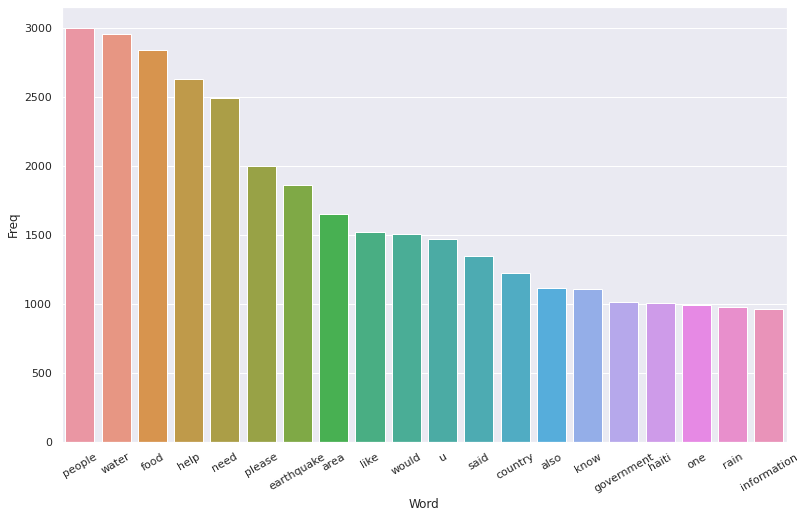

In [162]:
#Most frequently occuring words
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    
    vec = CountVectorizer(tokenizer=tokenize).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]


# Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(df.message, n=20)
print(top_words)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]


#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df);
g.set_xticklabels(g.get_xticklabels(), rotation=30);